### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

### Reading csv file

In [61]:
df = pd.read_csv(r"../Data/data.csv") 

### Initial data inspection

In [119]:
df.columns

Index(['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Budget',
       'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue',
       'ROI', 'Duration', 'Start_Date', 'End_Date', 'Customer_Satisfaction',
       'Campaign_Effectiveness', 'Market_Segment'],
      dtype='object')

In [120]:
df.head(1)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium


In [62]:
df.shape # To see dimensions

(5000, 19)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4020 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Campaign_ID             3810 non-null   object        
 1   Channel                 4020 non-null   object        
 2   Product_Category        4020 non-null   object        
 3   Region                  4020 non-null   object        
 4   Budget                  3616 non-null   float64       
 5   Spend                   3627 non-null   float64       
 6   Impressions             3627 non-null   float64       
 7   Clicks                  3629 non-null   float64       
 8   CTR                     3611 non-null   float64       
 9   Conversions             3621 non-null   float64       
 10  CR                      3621 non-null   float64       
 11  Revenue                 3596 non-null   float64       
 12  ROI                     3616 non-null   float64      

In [109]:
df.describe()

,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness
count,3821.000000,3823.000000,3.829000e+03,3831.000000,3817.000000,3825.000000,3822.000000,3.802000e+03,3824.000000,4249,4249,3814.000000,3828.000000
mean,258316.563946,225436.496406,5.026237e+05,25396.428006,0.498331,5003.214617,0.502697,5.050001e+05,2.522329,2022-07-29 00:00:57.652459008,2022-11-08 14:47:19.578824704,2.991085,5.541275
min,10014.000000,1.000000,1.593000e+03,104.000000,0.000500,13.000000,0.000300,0.000000e+00,0.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,1.000000,1.000000
25%,136717.000000,110515.500000,2.535030e+05,12307.000000,0.243000,2558.000000,0.263225,2.500715e+05,1.247500,2023-03-23 00:00:00,2023-04-07 00:00:00,2.000000,3.000000
50%,261539.000000,226608.000000,5.045720e+05,25698.000000,0.495400,4982.000000,0.505725,5.021112e+05,2.570000,2023-06-24 00:00:00,2023-07-07 00:00:00,3.000000,6.000000
75%,379156.000000,335711.500000,7.498180e+05,37921.000000,0.752300,7430.000000,0.746050,7.551570e+05,3.780000,2023-09-27 00:00:00,2023-10-08 00:00:00,4.000000,8.000000
max,735775.035200,581673.197900,1.411957e+06,76213.209580,1.438756,14877.828130,1.479276,1.467097e+06,7.366649,2024-01-01 00:00:00,2024-11-29 00:00:00,5.000000,10.000000
std,140596.601663,129452.814733,2.874246e+05,14750.499812,0.290522,2854.408148,0.286928,2.912473e+05,1.454725,NaN,NaN,1.399646,2.838501


In [ ]:
df.duplicated().sum() #No duplicates

np.int64(0)

### Columns Nulls (%)

In [87]:
#Cantidad de nulos por columna en porcentaje
df.isnull().sum() / df.shape[0] * 100

Campaign_ID                5.224759
Channel                    5.342434
Product_Category           5.295364
Region                     5.271829
Budget                    10.072958
Spend                     10.025888
Impressions                9.884679
Clicks                     9.837609
CTR                       10.167098
Conversions                9.978819
CR                        10.049423
Revenue                   10.520122
ROI                       10.002353
Duration                   0.000000
Start_Date                 0.000000
End_Date                   0.000000
Customer_Satisfaction     10.237703
Campaign_Effectiveness     9.908214
Market_Segment             5.224759
dtype: float64

<Axes: >

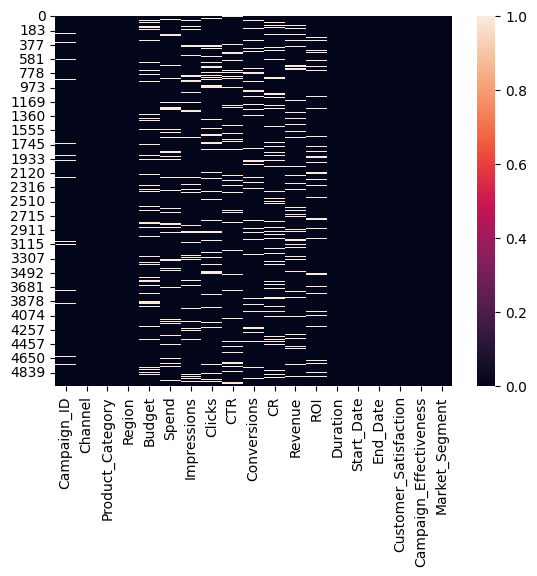

In [80]:
sns.heatmap(df.isnull(), cbar=True)

# OUTLIERS TREATMENT

Histogramas

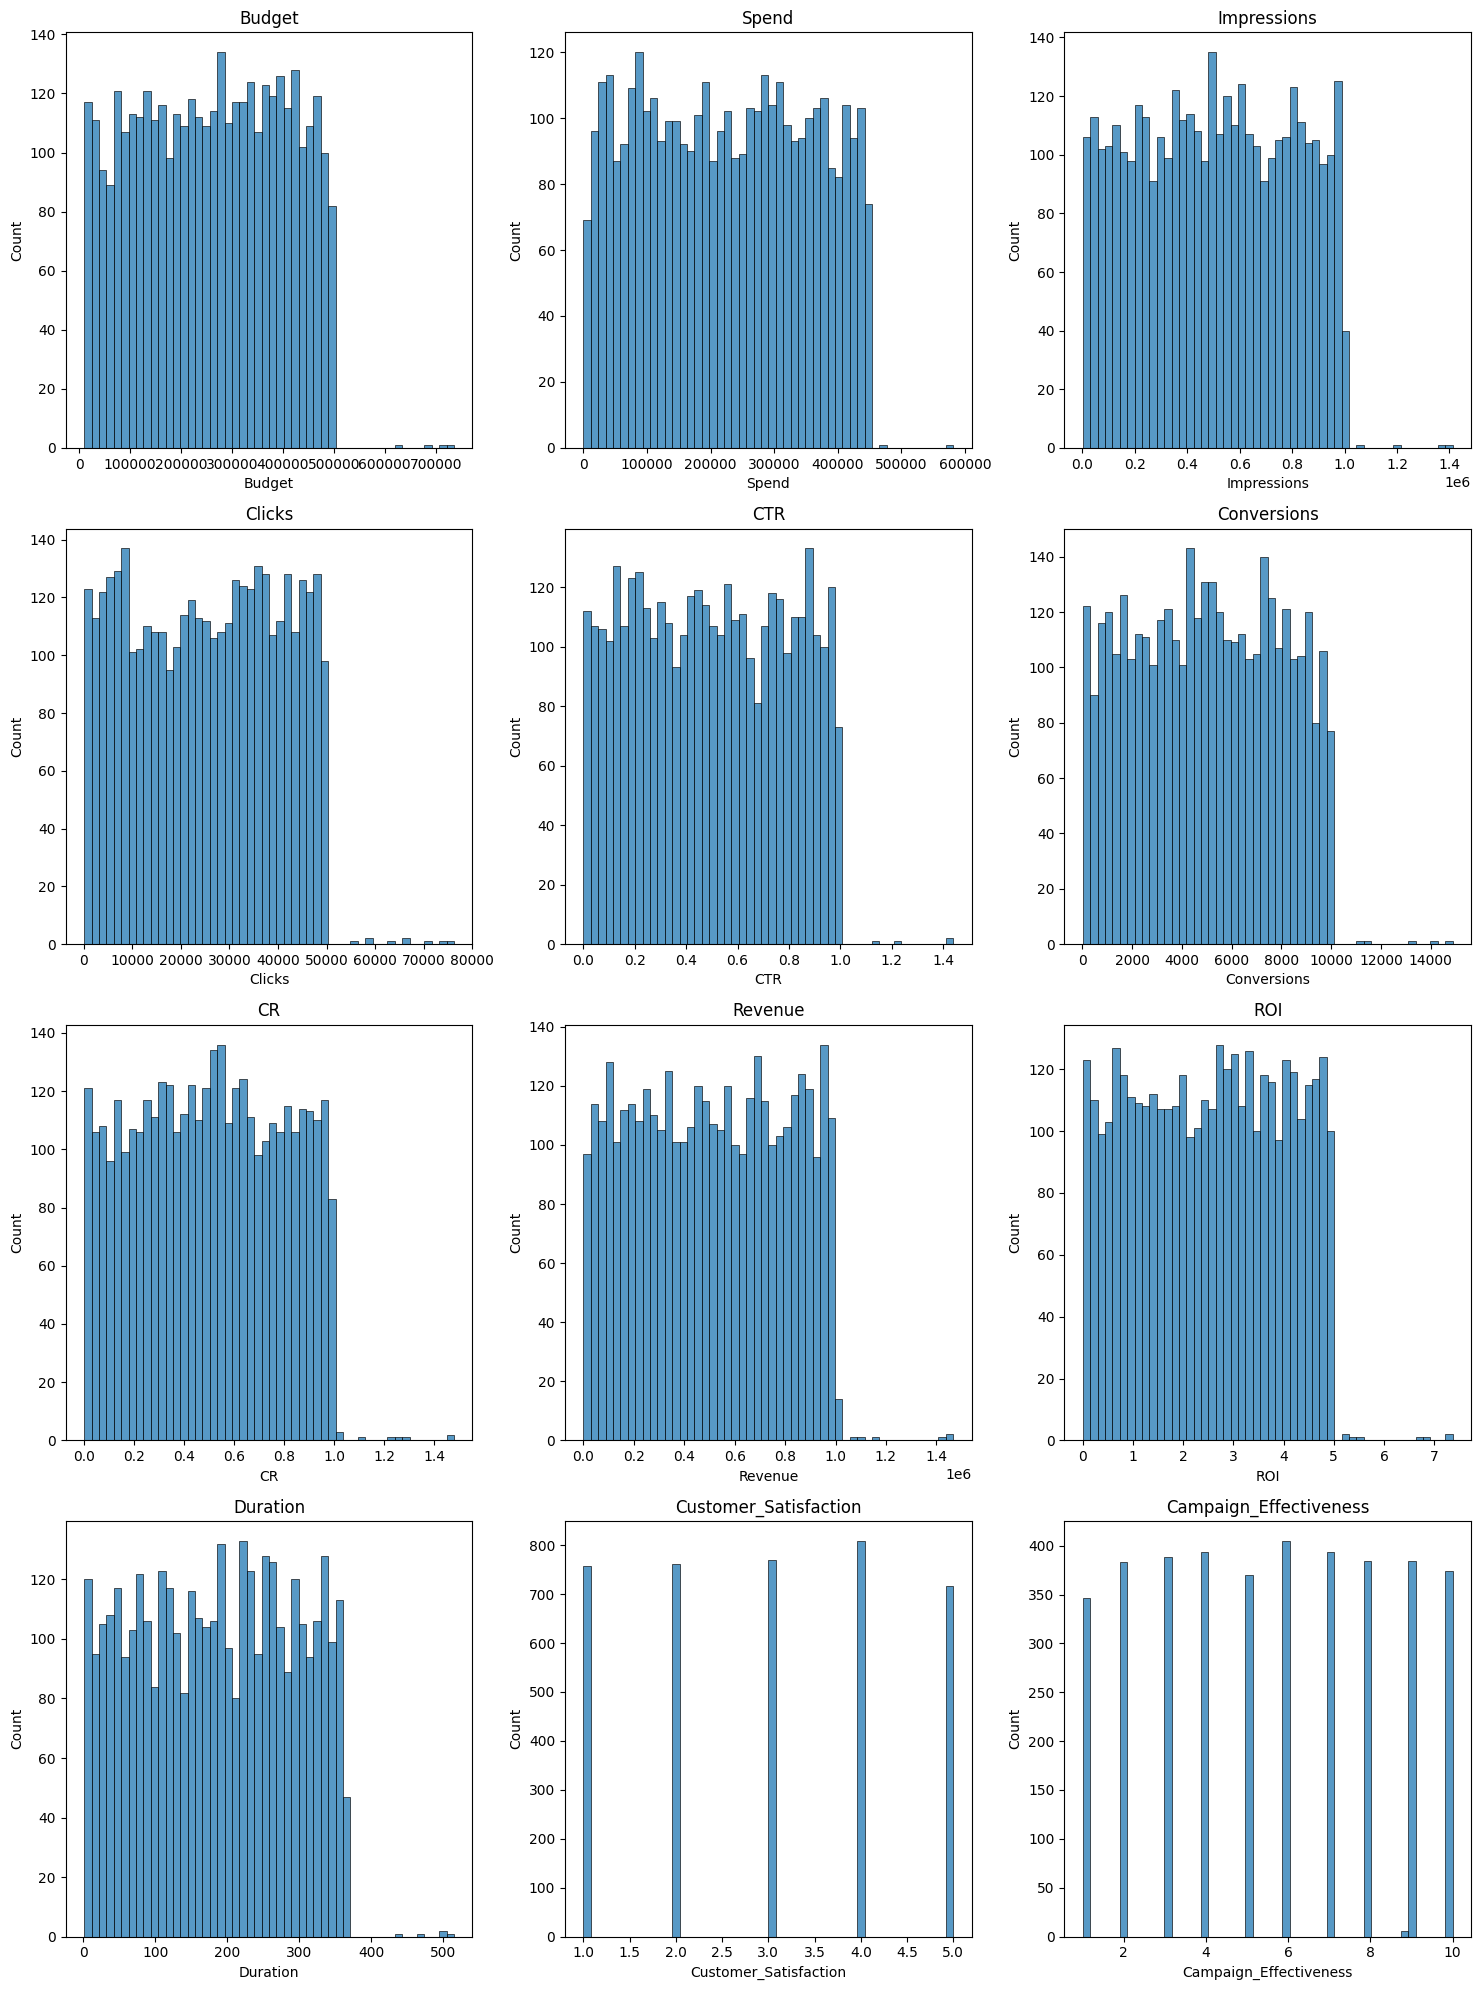

In [66]:
# sacar una lista de variables numericas
numeric_columns = df.select_dtypes(include = "number").columns

# Graficar la distribucion de las variables numericas con un hisplot y un bucle
# Definir el tamaño del lienzo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar la distribución de las variables numéricas
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=50, ax=axes[i])
    axes[i].set_title(col)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()


Regresiones

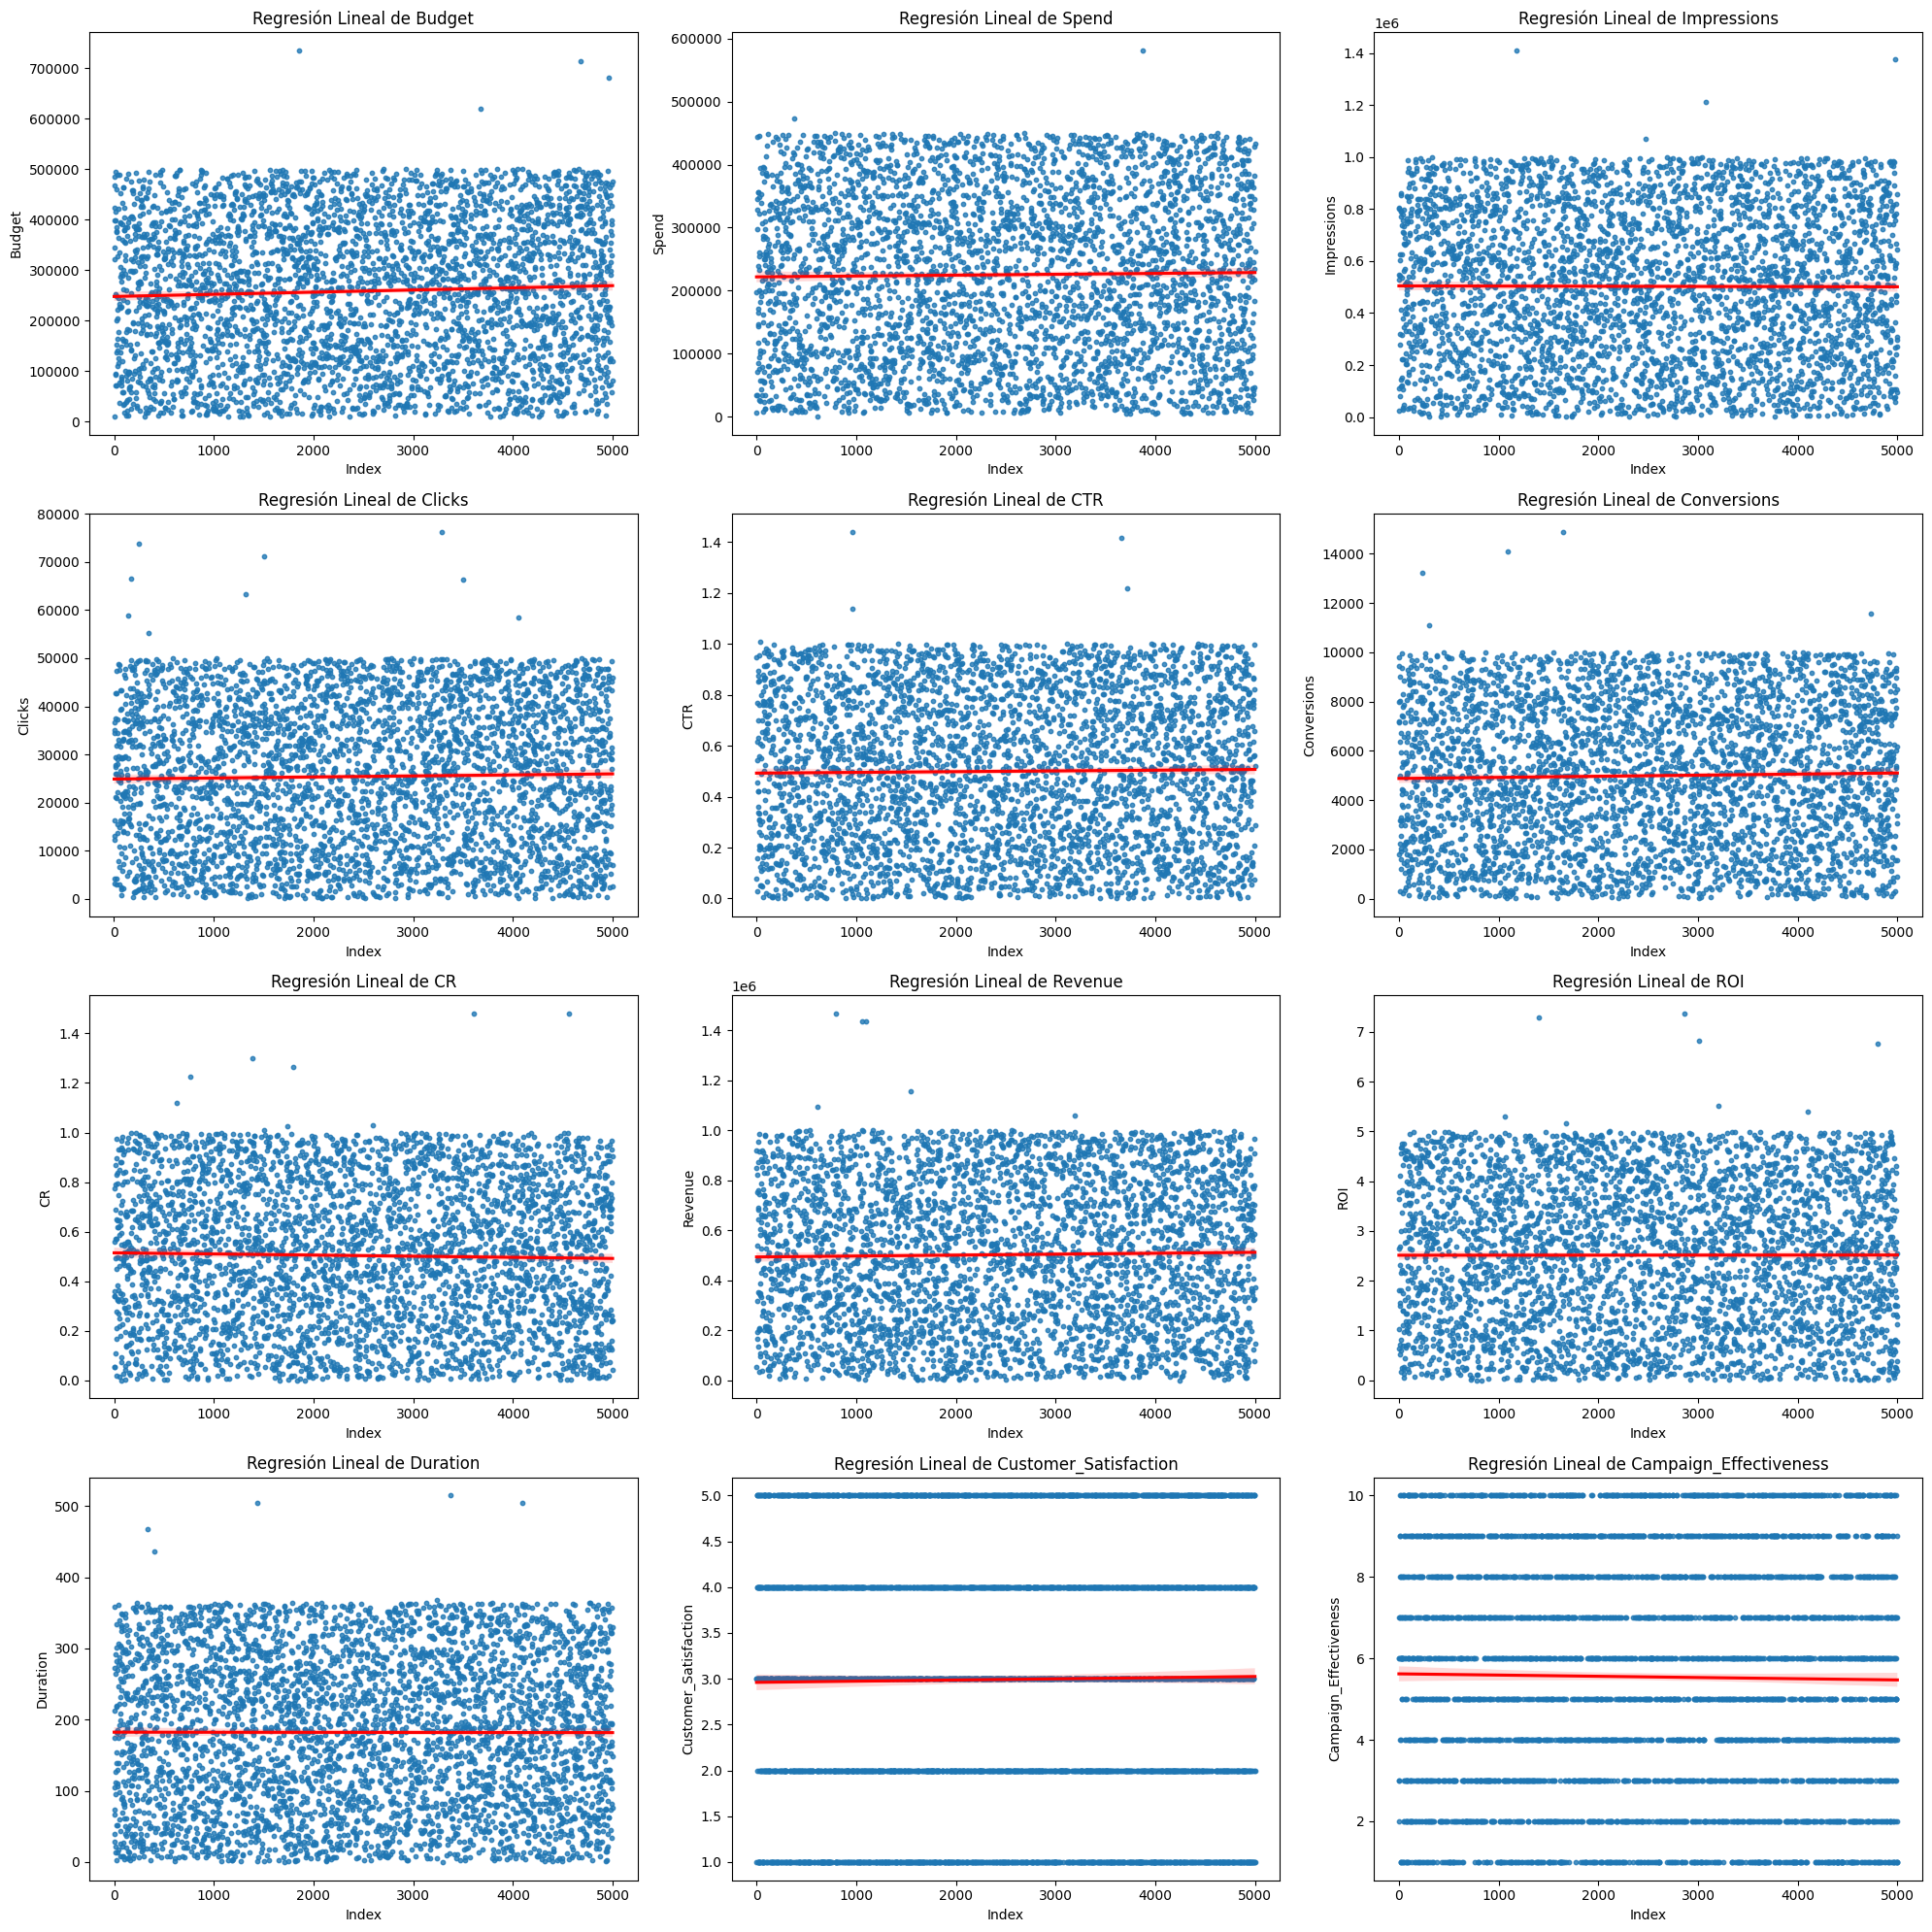

In [204]:
# Definir el tamaño del lienzo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar la distribución de las variables numéricas
for i, col in enumerate(numeric_columns):
    sns.regplot(x=df.index, y=col, data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'Regresión Lineal de {col}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()

Boxplots

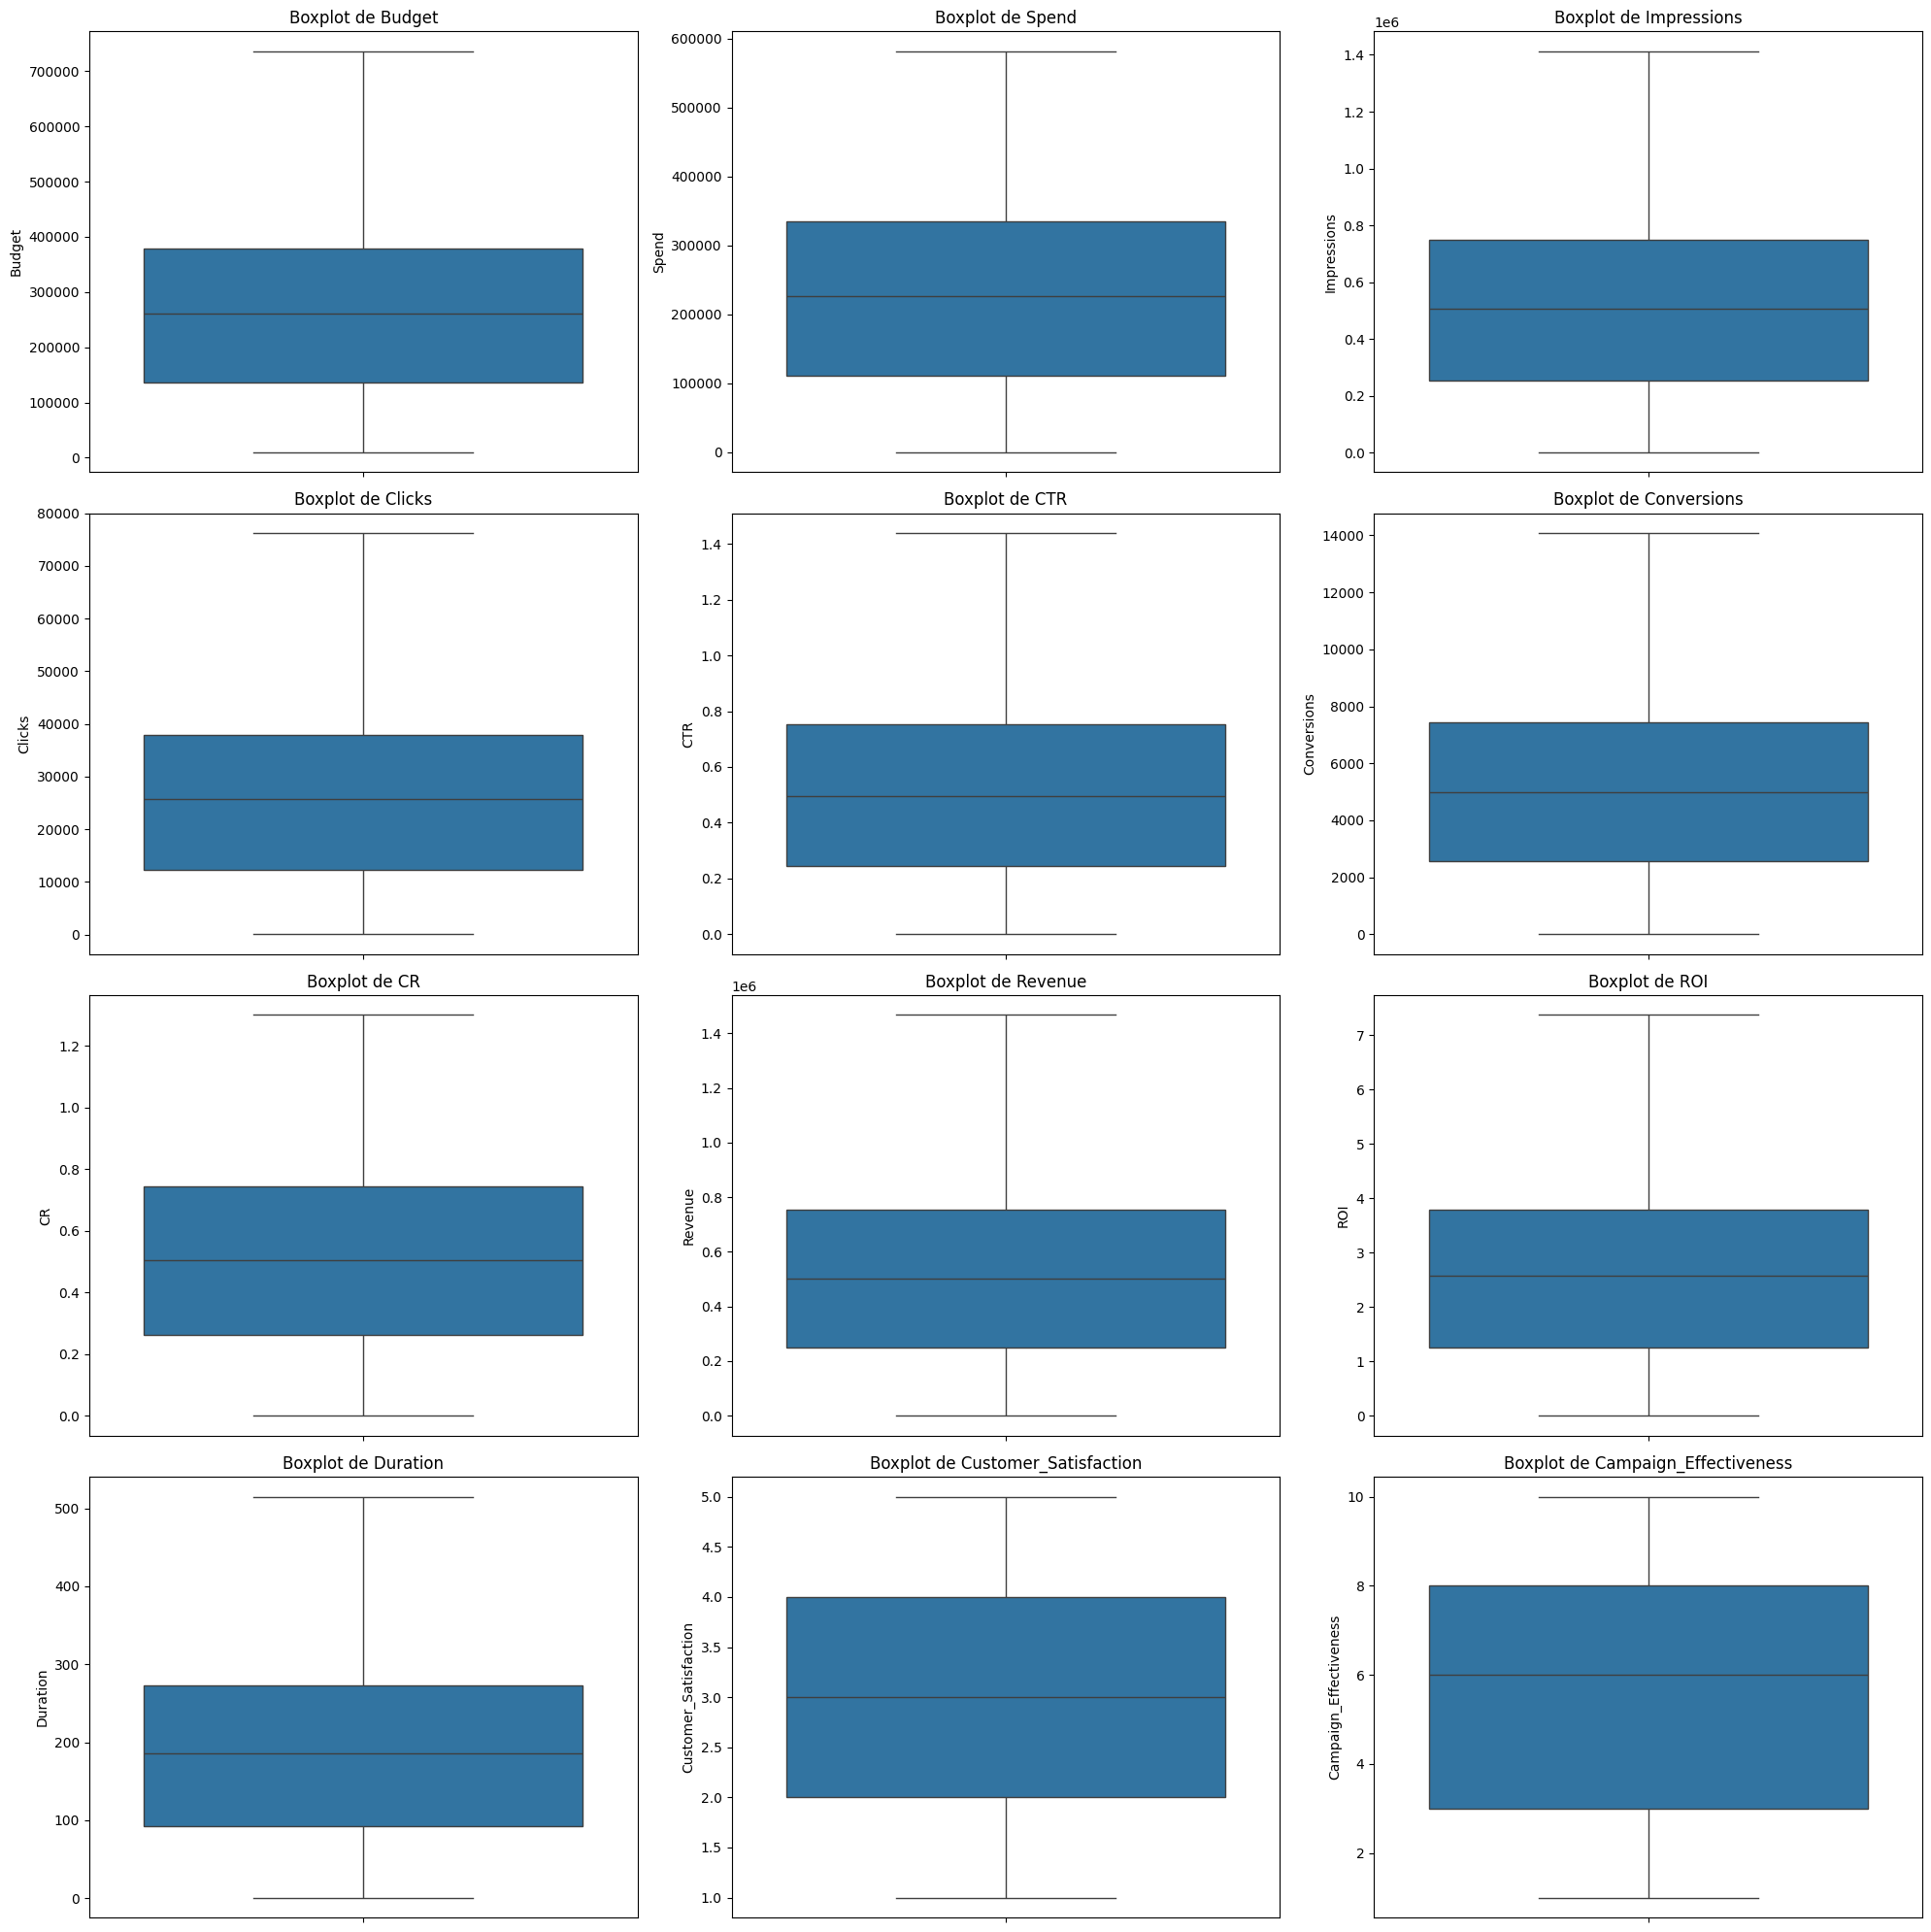

In [13]:
# Definir el tamaño del lienzo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar el boxplot de las variables numéricas
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()

### Eliminar outliers que superen el Q3 + 3.0 * IQR Y EL RESTO LOS REEMPLAZO POR LA MEDIANA

In [65]:
# Calcular el rango intercuartílico (IQR) para todas las columnas numéricas
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites superior e inferior para todas las columnas numéricas
extreme_upper_bound = Q3 + 3.0 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Eliminar los outliers que superen el límite superior extremo
df = df[~((df[numeric_columns] > extreme_upper_bound)).any(axis=1)]

# Calcular las medianas de las columnas numéricas
medians = df[numeric_columns].median()

# Reemplazar los outliers restantes por la mediana de cada columna
for col in numeric_columns:
    df.loc[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), col] = medians[col]

# Verificar el resultado
df.describe()

#Crear copia de estos resultados en una df_sin_outliers
df_sin_outliers = df.copy()

In [170]:
df_sin_outliers.shape

(4297, 19)

In [171]:
df.shape

(4297, 19)

# NULLS TREATMENT

QUE VARIABLES SE PODRIAN PREDECIR CONSIDERANDO OTRAS? 
- CAMPEIN_EFECTIVENESS: NO (DEPENDE DEL CRITERIO DEL EQUIPO DE MARKETING) <br/>
- Customer_Satisfaction: NO (DEPENDE DEL CRITERIO DEL CONSUMIDOR) <br/>
- Market_Segment: NO, ES EL SEGMENTO DE MERCADO OBJETIVO DE LA CAMAPAÑA <br/>

- END Y START DATE: NO. PARA NO ELIMINAR PUEDO PONER LOS NULOS COMO "UNKNOWN" o algo así <br/>
- DURACION: NO HACE FALTA SE PUEDE CALCULAR CON LAS FECHAS (SI LAS TENGO), las que no poner como "UNKNOWN" <br/>

- ROI: SI, CON LAS VARIABLES DE SPEND Y REVENUE <br/>
- REVENUE: SI, CON LAS CONVERSIONES QUIZÁS <br/> 
- SPEND: SI, CON LAS IMPRESIONES <br/>
- BUDGET:NO, PORQUE POR MUCHO QUE TENGAN LA INVERSION NO ESTA RELACIONADA A ESTO <br/>
- CLICKS: CON LAS IMPRESSIONS <br/>
- IMPRESSIONS
- Conversions 

- CR (Tasa de conversion): SI, CON CONVERSIONS E IMPRESSIONS <br/>
- CTR: SI, CON LOS CLICKS Y IMPRESSIONS <br/>

CLASE LUNES 01:00:00 HABLAN DE LAS FECHAS
1:49 knn 

### PRIMERO REPARO VALORES DONDE NO NECESITO HACER PREDICCIONES
1. Fixear Duration, End_Date, Star_Date
    - Reparar duration
    - Reparar fechas si se puede
    - Todo lo que no sabemos le ponemos Uknown
2. Crear un data frame sin nulos para entrenar un modelo de predicción knn y luego estimar los valores faltantes del dataframe original con nulos

Ultimo paso arreglar las campaign id porque seguirán un orden desde el 1 hasta el ultimo

### REPARACION DURATION AND DATES

In [67]:
# Convertir las columnas Start_Date y End_Date a formato de fecha
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce', dayfirst=True)
df['End_Date'] = pd.to_datetime(df['End_Date'], errors='coerce', dayfirst=True)

# Calcular la duración en días
df['Calculated_Duration'] = (df['End_Date'] - df['Start_Date']).dt.days

# Asegurarse de que la duración no sea negativa
df.loc[df['Calculated_Duration'] < 0, 'Calculated_Duration'] = np.nan

# Rellenar los valores nulos de Duration con los valores calculados
df['Duration'] = df['Duration'].fillna(df['Calculated_Duration'])

# Eliminar la columna Calculated_Duration
df = df.drop(columns=['Calculated_Duration'])

In [68]:
# Reparar Start_Date si End_Date y Duration están presentes
df.loc[df['Start_Date'].isnull() & df['End_Date'].notnull() & df['Duration'].notnull(), 'Start_Date'] = \
    df['End_Date'] - pd.to_timedelta(df['Duration'], unit='D')

# Reparar End_Date si Start_Date y Duration están presentes
df.loc[df['End_Date'].isnull() & df['Start_Date'].notnull() & df['Duration'].notnull(), 'End_Date'] = \
    df['Start_Date'] + pd.to_timedelta(df['Duration'], unit='D')

No quiero valores `Nat`entonces los relleno con 1900-01-01

In [69]:
# Rellenar los valores NaT en las columnas de fecha con una fecha predeterminada
df['Start_Date'] = df['Start_Date'].fillna(pd.Timestamp('1900-01-01'))
df['End_Date'] = df['End_Date'].fillna(pd.Timestamp('1900-01-01'))

In [70]:
# Eliminar las filas de Duration que no se pueden calcular
df = df.dropna(subset=['Duration'])

In [32]:
df.head(10)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2023-03-02,2023-12-23,3.0,3.0,Medium
1,CAM0002,NaN,Health,Sarawak,468792.0,33743.0,527513.0,4130.0,0.9479,9459.0,NaN,921078.0,3.78,29.0,1900-01-01,1900-01-01,3.0,7.0,Medium
2,CAM0003,Radio,Electronics,Penang,10487.0,6745.0,806911.0,12209.0,NaN,7168.0,0.0517,51142.0,3.64,74.0,2023-04-12,2023-10-20,1.0,2.0,Medium
3,CAM0004,Email,Electronics,Penang,345431.0,329112.0,108570.0,34391.0,0.6157,7190.0,0.3579,191887.0,2.64,67.0,2023-04-24,2023-01-26,5.0,6.0,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.0,34365.0,799855.0,13056.0,NaN,1794.0,0.0544,167241.0,1.02,40.0,2023-01-10,2023-01-01,5.0,6.0,Low
5,CAM0006,TV,Electronics,Penang,422726.0,NaN,25680.0,16342.0,0.7683,9786.0,0.3395,480187.0,1.81,174.0,2023-08-16,2023-06-15,5.0,3.0,Medium
6,NaN,Radio,Automotive,Sarawak,NaN,444126.0,81342.0,35053.0,0.0303,290.0,0.5596,753564.0,2.69,105.0,2023-06-21,2023-07-07,4.0,7.0,High
8,CAM0009,NaN,Electronics,Johor,NaN,71027.0,543474.0,3181.0,0.5424,4982.0,NaN,318098.0,1.50,358.0,2023-06-21,2023-12-05,3.0,10.0,High
9,CAM0010,Radio,Automotive,NaN,399568.0,297974.0,319054.0,36693.0,0.1588,3160.0,0.7760,823506.0,2.32,272.0,2023-05-22,2023-11-05,NaN,9.0,Medium
11,CAM0012,TV,Groceries,Johor,494293.0,345013.0,278502.0,29474.0,0.4560,6381.0,0.1074,538807.0,0.71,21.0,2023-06-20,2023-07-11,NaN,8.0,Medium


### REPARANDO CHANNEL, PRODUCT CATEGORY, REGION y Market_Segment

In [71]:
# Mostrar los valores únicos de la columna 'Region', "Channnel" y "Product_Category" y la cantidad de veces que se repiten
channel_value_counts = df['Channel'].value_counts()
product_category_value_counts = df['Product_Category'].value_counts()
region_value_counts = df['Region'].value_counts()
market_segment_value_counts = df['Market_Segment'].value_counts()

print(channel_value_counts)
print(product_category_value_counts)
print(region_value_counts)
print(market_segment_value_counts)



Channel
Social Media    793
Billboard       781
Radio           779
Email           731
TV              722
Name: count, dtype: int64
Product_Category
Groceries      807
Electronics    782
Health         762
Automotive     735
Fashion        724
Name: count, dtype: int64
Region
Kuala Lumpur    803
Sarawak         786
Penang          751
Sabah           742
Johor           722
Name: count, dtype: int64
Market_Segment
High      1283
Medium    1273
Low       1255
Name: count, dtype: int64


Al  no haber mucha diferencia entre la cantidad de veces que se repite cada valor, usar la moda para reparar los nulos no sería la mejor estrategia. Por ende voy a reparar los datos nulos de manera proporcional a la frecuencia que se repite cada valor. 

In [74]:
null_count_region = df['Region'].isnull().sum()
null_count_channel = df['Channel'].isnull().sum()
null_count_product_category = df['Product_Category'].isnull().sum()
null_count_market_segment = df['Market_Segment'].isnull().sum()

print(f"La cantidad de valores nulos en la columna 'Region' es: {null_count_region}")
print(f"La cantidad de valores nulos en la columna 'Channel' es: {null_count_channel}")
print(f"La cantidad de valores nulos en la columna 'Product_Category' es: {null_count_product_category}")
print(f"La cantidad de valores nulos en la columna 'Market_Segment' es: {null_count_market_segment}")

La cantidad de valores nulos en la columna 'Region' es: 0
La cantidad de valores nulos en la columna 'Channel' es: 0
La cantidad de valores nulos en la columna 'Product_Category' es: 0
La cantidad de valores nulos en la columna 'Market_Segment' es: 0


In [73]:
# Calcular las frecuencias de los valores más comunes
value_counts_region = df['Region'].value_counts()
value_counts_channel = df['Channel'].value_counts()
value_counts_product_category = df['Product_Category'].value_counts()
value_counts_market_segment = df['Market_Segment'].value_counts()

# Seleccionar los valores más comunes, pongo 5 ya que todos tienen una frecuencia parecida, si hubiese dos valores dominantes pondría 2
top_values_region = value_counts_region.nlargest(5)
top_values_channel = value_counts_channel.nlargest(5)
top_values_product_category = value_counts_product_category.nlargest(5)
top_values_market_segment = value_counts_market_segment.nlargest(3)

# Calcular las proporciones
total_top_values_region = top_values_region.sum()
proportions = top_values_region / total_top_values_region

total_top_values_channel = top_values_channel.sum()
proportions_channel = top_values_channel / total_top_values_channel

total_top_values_product_category = top_values_product_category.sum()
proportions_product_category = top_values_product_category / total_top_values_product_category

total_top_values_market_segment = top_values_market_segment.sum()
proportions_market_segment = top_values_market_segment / total_top_values_market_segment

# Crear una lista de valores para rellenar los nulos
fill_values = np.random.choice(top_values_region.index, size=df['Region'].isnull().sum(), p=proportions)
fill_values_channel = np.random.choice(top_values_channel.index, size=df['Channel'].isnull().sum(), p=proportions_channel)
fill_values_product_category = np.random.choice(top_values_product_category.index, size=df['Product_Category'].isnull().sum(), p=proportions_product_category)
fill_values_market_segment = np.random.choice(top_values_market_segment.index, size=df['Market_Segment'].isnull().sum(), p=proportions_market_segment)

# Rellenar los valores nulos de manera proporcional
df.loc[df['Region'].isnull(), 'Region'] = fill_values
df.loc[df['Channel'].isnull(), 'Channel'] = fill_values_channel
df.loc[df['Product_Category'].isnull(), 'Product_Category'] = fill_values_product_category
df.loc[df['Market_Segment'].isnull(), 'Market_Segment'] = fill_values_market_segment

# Verificar el resultado
print(df['Region'].value_counts())
print(df['Channel'].value_counts())
print(df['Product_Category'].value_counts())
print(df['Market_Segment'].value_counts())

Region
Kuala Lumpur    846
Sarawak         832
Sabah           789
Penang          788
Johor           765
Name: count, dtype: int64
Channel
Social Media    843
Radio           823
Billboard       821
Email           772
TV              761
Name: count, dtype: int64
Product_Category
Groceries      856
Electronics    824
Health         792
Automotive     775
Fashion        773
Name: count, dtype: int64
Market_Segment
High      1368
Medium    1336
Low       1316
Name: count, dtype: int64


### REPARANDO CAMPAING EFECTIVENESS Y CUSTOMER SATISFACTION

In [75]:
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].round()

In [76]:
# Mostrar los valores únicos de la columna 'Campaign_Effectiveness' y cuántas veces se repiten
campaign_effectiveness_counts = df['Campaign_Effectiveness'].value_counts()
print("Campaign_Effectiveness counts:")
print(campaign_effectiveness_counts)

# Mostrar los valores únicos de la columna 'Customer_Satisfaction' y cuántas veces se repiten
customer_satisfaction_counts = df['Customer_Satisfaction'].value_counts()
print("\nCustomer_Satisfaction counts:")
print(customer_satisfaction_counts)

Campaign_Effectiveness counts:
Campaign_Effectiveness
6.0     384
7.0     376
3.0     371
9.0     371
4.0     371
2.0     364
8.0     363
10.0    350
5.0     347
1.0     324
Name: count, dtype: int64

Customer_Satisfaction counts:
Customer_Satisfaction
4.0    770
3.0    734
2.0    723
1.0    713
5.0    669
Name: count, dtype: int64


In [79]:
#Null count de Campaign_Effectiveness y Customer_Satisfaction
null_count_campaign_effectiveness = df['Campaign_Effectiveness'].isnull().sum()
null_count_customer_satisfaction = df['Customer_Satisfaction'].isnull().sum()

print(f"\nLa cantidad de valores nulos en la columna 'Campaign_Effectiveness' es: {null_count_campaign_effectiveness}")
print(f"La cantidad de valores nulos en la columna 'Customer_Satisfaction' es: {null_count_customer_satisfaction}")


La cantidad de valores nulos en la columna 'Campaign_Effectiveness' es: 0
La cantidad de valores nulos en la columna 'Customer_Satisfaction' es: 0


In [78]:
# calcular las frecuencias de los valores más comunes
value_counts_campaign_effectiveness = df['Campaign_Effectiveness'].value_counts()
value_counts_customer_satisfaction = df['Customer_Satisfaction'].value_counts()

# Seleccionar los valores más comunes
top_values_campaign_effectiveness = value_counts_campaign_effectiveness.nlargest(10)
top_values_customer_satisfaction = value_counts_customer_satisfaction.nlargest(5)

# Calcular las proporciones
total_top_values_campaign_effectiveness = top_values_campaign_effectiveness.sum()
proportions_campaign_effectiveness = top_values_campaign_effectiveness / total_top_values_campaign_effectiveness

total_top_values_customer_satisfaction = top_values_customer_satisfaction.sum()
proportions_customer_satisfaction = top_values_customer_satisfaction / total_top_values_customer_satisfaction

# Crear una lista de valores para rellenar los nulos
fill_values_campaign_effectiveness = np.random.choice(top_values_campaign_effectiveness.index, size=df['Campaign_Effectiveness'].isnull().sum(), p=proportions_campaign_effectiveness)
fill_values_customer_satisfaction = np.random.choice(top_values_customer_satisfaction.index, size=df['Customer_Satisfaction'].isnull().sum(), p=proportions_customer_satisfaction)

# Rellenar los valores nulos de manera proporcional
df.loc[df['Campaign_Effectiveness'].isnull(), 'Campaign_Effectiveness'] = fill_values_campaign_effectiveness
df.loc[df['Customer_Satisfaction'].isnull(), 'Customer_Satisfaction'] = fill_values_customer_satisfaction

# Verificar el resultado
print(df['Campaign_Effectiveness'].value_counts())
print(df['Customer_Satisfaction'].value_counts())


Campaign_Effectiveness
6.0     429
3.0     424
7.0     415
9.0     410
8.0     407
4.0     401
2.0     399
5.0     394
10.0    384
1.0     357
Name: count, dtype: int64
Customer_Satisfaction
4.0    867
1.0    809
3.0    803
2.0    802
5.0    739
Name: count, dtype: int64


### NUMERIC COLUMN NULLS TREATMENT

Para determinar por cuál variable empezar, es importante considerar la relación entre las variables y cómo la disponibilidad de datos puede afectar la precisión de las predicciones. Dado que algunas variables dependen de otras (por ejemplo, ROI depende de Revenue y Spend), es mejor comenzar con las variables que tienen menos dependencia de otras.

Por lo tanto, considerando las siguientes relaciones:

- Clicks: Esta variable es fundamental y no depende directamente de otras variables.
- Impressions: Aunque no depende directamente de otras variables, está relacionada con Clicks y CTR.
- CTR (Click Through Rate): Esta variable se calcula como Clicks/Impressions, por lo que necesitarás tener valores para Clicks e Impressions.
- Conversions: Esta variable depende de los Clicks.
- CR (Conversion Rate): Esta variable se calcula como Conversions/Clicks, por lo que necesitarás tener valores para Conversions y Clicks.
- Spend: Esta variable puede ser independiente, pero es importante para calcular ROI.
- Revenue: Esta variable es independiente pero necesaria para calcular ROI.
- ROI (Return on Investment): Esta variable se calcula como Revenue/Spend, por lo que necesitarás tener valores para Revenue y Spend.

Seguiremos este paso a paso:

1. Predecir Clicks:
Crear un DataFrame sin valores nulos excepto en la columna Clicks.
Entrenar un modelo para predecir Clicks.

2. Predecir Impressions:
Crear un DataFrame sin valores nulos excepto en la columna Impressions.
Entrenar un modelo para predecir Impressions.

3. Predecir CTR:
Crear un DataFrame sin valores nulos excepto en la columna CTR.
Entrenar un modelo para predecir CTR.

4. Predecir Conversions:
Crear un DataFrame sin valores nulos excepto en la columna Conversions.
Entrenar un modelo para predecir Conversions.

5. Predecir CR:
Crear un DataFrame sin valores nulos excepto en la columna CR.
Entrenar un modelo para predecir CR.

6. Predecir Spend:
Crear un DataFrame sin valores nulos excepto en la columna Spend.
Entrenar un modelo para predecir Spend.

7. Predecir Revenue:
Crear un DataFrame sin valores nulos excepto en la columna Revenue.
Entrenar un modelo para predecir Revenue.

8. Predecir ROI:
Crear un DataFrame sin valores nulos excepto en la columna ROI.
Entrenar un modelo para predecir ROI.

In [260]:
# Crear una copia del DataFrame excluyendo los valores nulos de todas las columnas excepto 'Clicks'
df_train1 = df.dropna(subset=[col for col in df.columns if col != 'Impressions'])

# Mantener los valores nulos en la columna 'Region'
df_train1['Impressions'] = df['Impressions']

# Verificar nulos de df_trai
df_train1.isnull().sum()

C:\Users\Germán\AppData\Local\Temp\ipykernel_31592\804738300.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['Impressions'] = df['Impressions']


Campaign_ID                 0
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions               168
Clicks                      0
CTR                         0
Conversions                 0
CR                          0
Revenue                     0
ROI                         0
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment              0
dtype: int64

In [ ]:
# CR, IMPRESSIONS, ROI, SPEND, CONVERSIONS, REVENUE, CTR, CLICKS, Budget
columnas_train = ['Budget', 'Impressions' , 'Spend', 'Conversions', 'Revenue', 'Clicks']

In [272]:
#Verificar que no hay valores negativos en estas columnas
df_train1[columnas_train].min()


Budget         10129.0
Impressions     1708.0
Spend           5265.0
Conversions       13.0
Revenue         1412.0
Clicks           104.0
dtype: float64

In [273]:
# Separar la varible objetivo (y) y las variables predictoras (X). Donde Clicks es la variable objetivo
df_with_impressions = df_train1.dropna(subset=['Impressions'])
df_without_impressions = df_train1[df_train1['Impressions'].isnull()].drop(columns='Impressions')



In [274]:
x_train, x_test, y_train, y_test = train_test_split(df_with_impressions[columnas_train], df_with_impressions['Impressions'], test_size=0.2, random_state=42)

scores: [-1.65885645e+09 -1.60224312e+09 -1.41851956e+09 -1.62709855e+09
 -1.34717990e+09 -1.96673608e+09 -1.50216635e+09 -1.72714651e+09
 -1.45924600e+09 -1.76976167e+09]
scores: [-1.31848765e+09 -1.13007921e+09 -1.12730998e+09 -1.31701580e+09
 -9.30998866e+08 -1.04725055e+09 -1.12954069e+09 -1.10358008e+09
 -9.36996783e+08 -9.40778871e+08]
scores: [-1.11952808e+09 -1.08164659e+09 -9.06922610e+08 -8.86550459e+08
 -8.39417283e+08 -9.63180976e+08 -9.89106303e+08 -9.27719854e+08
 -9.32015818e+08 -8.40389776e+08]
scores: [-8.73935860e+08 -1.04269324e+09 -7.65498808e+08 -7.69964062e+08
 -7.70998734e+08 -6.04777458e+08 -8.69259183e+08 -8.63554069e+08
 -7.99454831e+08 -8.35956954e+08]
scores: [-8.49962755e+08 -9.41601154e+08 -7.39662630e+08 -7.54529948e+08
 -7.65053771e+08 -5.95251833e+08 -8.09956111e+08 -7.91553225e+08
 -7.97365397e+08 -6.22991544e+08]
scores: [-8.44942034e+08 -9.25383026e+08 -7.96057205e+08 -8.13154701e+08
 -5.77510715e+08 -5.86774016e+08 -7.48497359e+08 -7.38265172e+08
 -

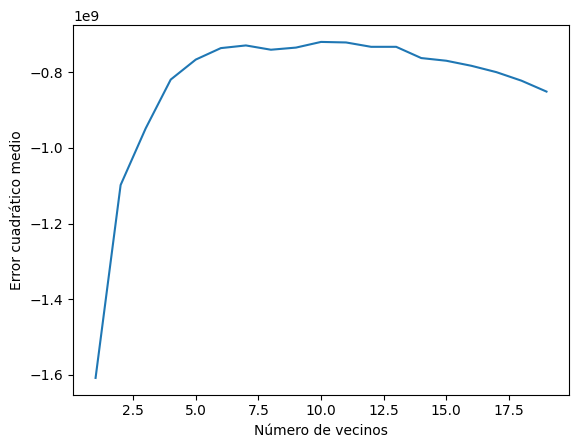

In [275]:
mse = []
k_range = range(1, 20)

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='neg_mean_squared_error')
    mse.append(scores.mean())
    print(f"scores: {scores}")

#Graficar el error cuadratico medio en funcion del numero de vecinos
plt.plot(k_range, mse)
plt.xlabel('Número de vecinos')
plt.ylabel('Error cuadrático medio')
plt.show()

In [265]:
best_k = k_range[mse.index(min(mse))]
print(f"El mejor valor de k es: {best_k}")

El mejor valor de k es: 1
